In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Scikit-Learn provides the popular datasets easily
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- "data" Key -> Contains the data
- "target" Key -> Contains the labels
- "DESCR" Key -> Contains data description

In [3]:
data = mnist["data"]
labels = mnist["target"]
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Each row is an image with 28x28 pixels but aligned in one row

(-0.5, 27.5, 27.5, -0.5)

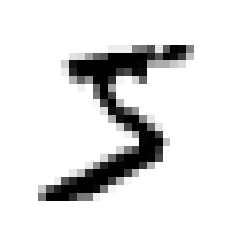

In [4]:
# to show one image
digit = data.iloc[0].values.reshape(28, 28)
plt.imshow(digit, cmap="binary")
plt.axis("off")

In [5]:
labels[0]  # Yes, the img up there is 5

'5'

In [6]:
# Casting labels to integer instead of strings.
labels = labels.astype(np.uint8)

In [7]:
train_data, train_labels = data[:60000], labels[:60000]
test_data, test_labels = data[60000:], labels[60000:]

### Starting with a binary classifier
Only differentiate 5 and not-5

In [8]:
train_labels_5 = (train_labels == 5)
test_labels_5 = (test_labels == 5)

In [9]:
# Let's start with Stochastic Gradiant Descent (SGD)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_data, train_labels_5)

SGDClassifier(random_state=42)

In [10]:
# Testing SGD
print(sgd_clf.predict([train_data.iloc[10]]))  # Result is False, the number is not 5
print(train_labels[10])  # This number is 3
# Hurray!

[False]
3


/Users/oabuhamdan/PycharmProjects/Hands_On_ML_Workspace/venv/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


### Performance measurement for classifier is trickier than for regressor.
### Occasionally, we will need more control over cross-validation than provided by sklearn.

In [11]:
# Cross Validation
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, train_data, train_labels_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Accuracy meter is not that good for classifiers especially for skewed data.
Confusion Matrix is much better. It will calculate how many times class A was predicted as class B.

In [12]:
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns the predictions made on each test fold, while cross_val_score returns the final scores.
train_data_pred = cross_val_predict(sgd_clf, train_data, train_labels_5, cv=3)
# We will plug train_data_pred to the confusion matrix to know the accuracy of SGD classifier
train_data_pred

array([ True, False, False, ...,  True, False, False])

In [13]:
from sklearn.metrics import confusion_matrix

cm_result = confusion_matrix(train_labels_5, train_data_pred)
cm_result

array([[53892,   687],
       [ 1891,  3530]])

Confusion matrix=
[true_negatives, false_positives]
[false_negatives, true_positives]

precision = TP / (TP + FP) -> Accuracy of positive predictions
recall = TP /(TP + FN) -> Ratio of positive instances that were correctly detected

In [14]:
from sklearn.metrics import precision_score, recall_score

precision_score(train_labels_5, train_data_pred)

0.8370879772350012

In [16]:
recall_score(train_labels_5, train_data_pred)

0.6511713705958311

F1 score is a combination (harmonic mean) of precision and recall.
A harmonic mean gives much more weight to low values.
Lookup F1 score equation online.
F1 score favours similar precision and recall, which is not always the case.
<em>Precision-Recall trade-off</em>


In [20]:
from sklearn.metrics import f1_score

f1_score(train_labels_5, train_data_pred)

0.7325171197343846

SGD classifier makes its predictions based on a threshold. If the instance is above a certain threshold, it's considered positive.
To get the score that SCG gave to one instance use .decision_function()
SGD threshold is Zero.

In [21]:
sgd_clf.decision_function(train_data)

array([  2164.22030239,  -5897.37359354, -13489.14805779, ...,
         6007.43513003,   -695.89564908,  -3991.49590678])

How to decide which threshold to use?
use cross_val_predict

In [22]:
data_scores = cross_val_predict(sgd_clf, train_data, train_labels_5, cv=3, method="decision_function")

In [23]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(train_labels_5, data_scores)

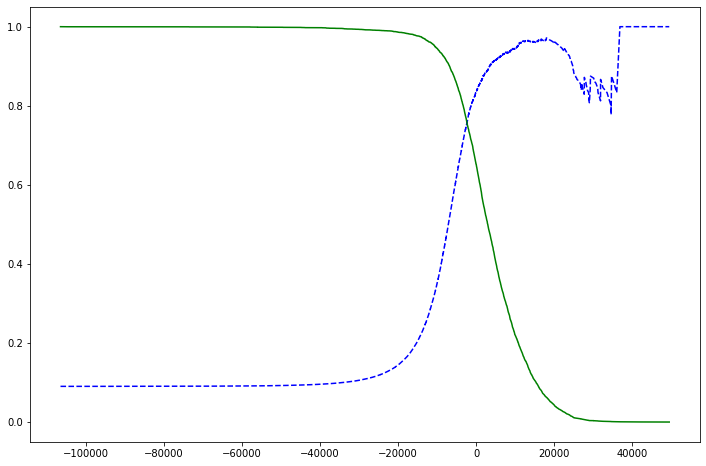

In [44]:
plt.figure(figsize=(12, 8))
plt.plot(threshold, precision[:-1], "b--", label="Precision")
plt.plot(threshold, recall[:-1], "g-", label="Recall")

In [56]:
# To use a precision of 90%
threshold_90_precision = threshold[np.argmax(precision >= .9)]  # first threshold that has 90% precision
train_label_pred_90 = (data_scores >= threshold_90_precision)  # List of True for data scores that has >= 90% precision

In [57]:
threshold_90_precision  # the threshold that gives me >=90% precision

3370.019499143958

In [58]:
precision_score(train_labels_5, train_label_pred_90)

0.9000345901072293

In [59]:
recall_score(train_labels_5, train_label_pred_90)

0.4799852425751706

If someone says "Let's reach 99% precision," you should ask, "At what recall?"

### The ROC Curve
- Receiver operating characteristic.
- Binary Classifier.
- Plots True Positive Rate (TPR)(Recall) vs False Positive Rate (FPR)
- FPR: Negative instances that were classified as positive.
- FPR = 1- TNR.
- TNR is also called specificity
- ROC plots sensitivity (recall) vs 1-specificity

In [60]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_labels_5, data_scores)

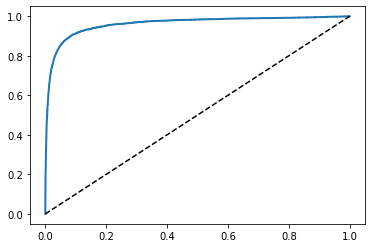

In [61]:
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')